**1.Preparar o ambiente**

Antes de executar o código, é necessário instalar as bibliotecas de ciência de dados e aprendizado de máquina. Use o comando a seguir no seu ambiente de terminal ou no notebook Jupyter para garantir que todas as dependências estejam instaladas.

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn

**2.Carregar o dataset**

Este bloco de código é uma sequência padrão para carregar um dataset de um arquivo CSV, especialmente em ambientes como o Google Colab.

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Carregue o arquivo CSV
df = pd.read_csv('mushroom_s1_odor_ohe.csv')

# Visualize os primeiros dados
df.head()

**3.Separar variáveis**

Este trecho de código é um passo fundamental em qualquer projeto de aprendizado de máquina. O objetivo é separar o seu conjunto de dados em dois componentes principais: as variáveis de entrada (features) e a variável de saída (alvo).

In [ ]:
# Separar os dados (X) e o alvo (y)
X = df.drop('class', axis=1)  # todas as colunas de odor
y = df['class']               # comestível (e) ou venenoso (p)


**4.Treino e teste**

Este trecho de código é essencial para a validação de modelos de aprendizado de máquina. Ele divide seu dataset em duas partes: uma para o modelo aprender e outra para ele ser avaliado.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


**5.GridSearchCV + SVM + Cross-validation**

Neste bloco, aplicamos um classificador SVM (Support Vector Machine) para prever a toxicidade dos cogumelos com base apenas no odor. Para garantir o melhor desempenho do modelo, utilizamos o GridSearchCV, que testa diferentes combinações de hiperparâmetros:

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definir os hiperparâmetros que serão testados
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Criar o modelo SVM
svm = SVC()

# Cross-validation estratificada
cv = StratifiedKFold(n_splits=5)

# GridSearchCV para encontrar os melhores parâmetros
grid = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy')
grid.fit(X, y)

# Mostrar os melhores parâmetros
print("Melhores parâmetros:", grid.best_params_)


Melhores parâmetros: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


**6.treinando modelo**

Neste passo, o modelo SVM é treinado utilizando o conjunto de dados de treino (X_train, y_train). O GridSearchCV realiza uma busca exaustiva pelas melhores combinações de hiperparâmetros definidos anteriormente, aplicando validação cruzada estratificada para garantir robustez na avaliação. Ao final do processo, o modelo fica ajustado com os parâmetros que proporcionaram a maior acurácia média.

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

**7.Avaliar o modelo**

Após o treinamento com GridSearchCV, o modelo é avaliado com o conjunto de teste (X_test, y_test) para verificar seu desempenho em dados não vistos.

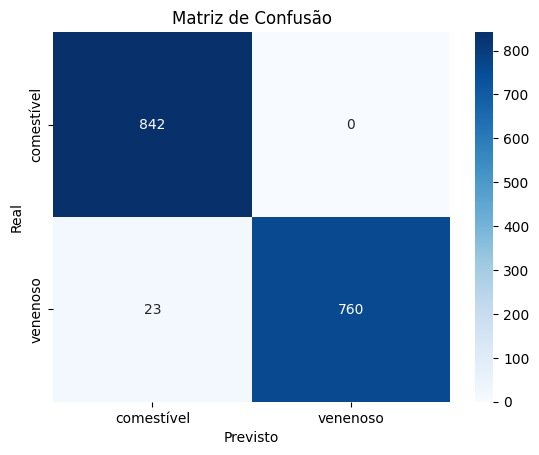

Acurácia: 0.9858461538461538
Matriz de Confusão:
 [[842   0]
 [ 23 760]]
Relatório de Classificação:
               precision    recall  f1-score   support

           e       0.97      1.00      0.99       842
           p       1.00      0.97      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
# Previsões com o melhor modelo
y_pred = grid.predict(X_test)

# Avaliação: matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['comestível', 'venenoso'],
            yticklabels=['comestível', 'venenoso'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# Matriz de confusão (em texto)
print("Matriz de Confusão:\n", cm)

# Relatório completo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


**Comentario final:**

Apesar da acurácia elevada, o modelo cometeu 23 erros ao classificar cogumelos venenosos como comestíveis. Em aplicações reais, esse tipo de erro pode ser perigoso. Isso mostra que, embora o odor seja uma variável relevante, talvez seja necessário incluir outras características para aumentar a segurança do modelo.